In [1]:
#Import all and create a data set

import pandas as pd 
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

genes = ['gene'+ str(i) for i in range(1,101)]
wt=['wt'+str(i) for i in range(1,6)]
ko=['ko'+str(i) for i in range(1,6)]

data = pd.DataFrame(columns=[*wt,*ko], index = genes)

for gene in data.index:
    data.loc[gene,'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
    data.loc[gene,'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
    

#transposeddata=data.T    
#print(data.head())
#print(data.shape)
#print(transposeddata)


In [2]:
#Center means around 0
#Scale the data so all std dev = 1.
#Transpose so sample in rows rather than columns so we use .T to transpose
scaled_data = preprocessing.scale(data.T)

#This can be used for machine learning as well bu twe only need PCA()
pca=PCA()

#All PCA math in here, loading scores and variation each component accounts for
pca.fit(scaled_data)

#Generate Coords for the graph based on the loading scores and scaled data
pca_data=pca.transform(scaled_data)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.


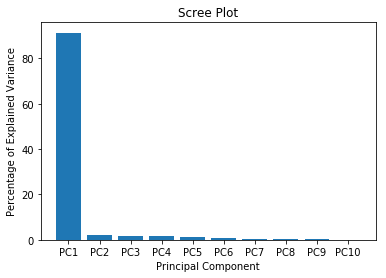

In [3]:
#Scree plot

#Calculate % that each comp accounts for
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)

#Create labels
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

#Create matplotlib bar (scree) plot
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [7]:
print(pca_data)

[[ 9.71914823e+00 -1.60222216e+00  1.47547061e-02  1.61357421e+00
  -1.39925488e+00  3.51462262e-01  2.77574996e-01  6.17024175e-01
  -7.79087423e-01  1.44328993e-15]
 [ 9.37270010e+00  1.22546103e+00  1.71542642e+00  9.55454298e-01
   1.76619294e+00  4.14366605e-02 -6.24457849e-02 -7.66089264e-01
  -4.68619214e-01  1.44328993e-15]
 [ 9.93967158e+00  2.77590843e-01 -1.41148971e+00  3.34818438e-01
   1.26955275e+00 -8.75048020e-01 -3.68826561e-01  1.03480183e+00
   6.18765947e-01  2.77555756e-15]
 [ 9.46843335e+00  2.42687895e+00 -8.47040240e-02 -1.62248592e+00
  -9.58236999e-01  1.16089165e+00  7.17227271e-01  6.95611892e-02
   2.82130085e-01  1.99840144e-15]
 [ 9.26904495e+00 -2.35585683e+00 -2.21569745e-01 -1.36002612e+00
  -6.60542199e-01 -6.58589701e-01 -5.56799269e-01 -9.99376237e-01
   3.24461468e-01  2.22044605e-16]
 [-9.50109980e+00 -3.65609420e-01  2.91910978e+00 -1.12247760e+00
  -2.30685058e-01 -4.66664851e-01 -3.46818081e-01  7.97020751e-01
   8.10591976e-02 -1.11022302e-15

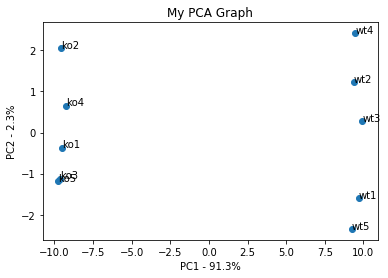

In [8]:

pca_df = pd.DataFrame(pca_data, index = [*wt, *ko], columns=labels)
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

#add sample names to the graph
for sample in pca_df.index:
    plt.annotate(sample,(pca_df.PC1.loc[sample],pca_df.PC2.loc[sample]))
    plt.show

In [ ]:

#Create pandas "Series" object with loading scores in PC1
#The pca components are a zero index so we start with 0 for pc1
loading_scores = pd.Series(pca.components_[0], index=genes)

#Sort the loading scores based on thier magnitude(absolute value)
sorted_loading_scores= loading_scores.abs().sort_values(ascending=False)

#Here we are just getting the names of the top 10 indexes (which are the gene names)
top_10_genes = sorted_loading_scores[0:10].index.values

#print the top 10 gene names and thier corresponding loading scores
print(loading_scores[top_10_genes])


#This means that a lot of genes played a role in separating the samples (because they are all similar in loading scores)

In [ ]:

#For scaling data
from sklearn.preprocessing import StandardScaler

%matplotlib inline

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

#Since PCA yields a feature subspace that maximizes the variance along the axes, it makes sense to standardize the data,
#especially, if it was measured on different scales. Although, all features in the Iris dataset were measured in centimeters,
#let us continue with the transformation of the data onto unit scale (mean=0 and variance=1), which is a requirement
#for the optimal performance of many machine learning algorithms.

features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df.loc[:, features].values
y = df.loc[:,['target']].values
x = StandardScaler().fit_transform(x)
pd.DataFrame(data = x, columns = features).head()
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()